In [2]:
#import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [226]:
#Load the dataset
df = pd.read_csv('Influencer.csv')
df.shape

(200, 10)

In [51]:
df.info

<bound method DataFrame.info of      Rank           Channel Info  Influence Score Followers Avg. Likes Posts  \
0       1            \ncristiano               92    485.2m       8.7m  3.4k   
1       2            kyliejenner               91    370.7m       8.2m  7.0k   
2       3             \nleomessi               90    363.9m       6.7m   915   
3       4          \nselenagomez               93    348.8m       6.1m  1.9k   
4       5              \ntherock               91    339.4m       1.8m  6.8k   
..    ...                    ...              ...       ...        ...   ...   
195   196  \nkhabib_nurmagomedov               63     33.6m     680.6k  4.6k   
196   197         \ndanbilzerian               84     33.6m       2.2m  1.4k   
197   198            \nraisa6690               80     33.6m     227.8k  4.2k   
198   199          \nluansantana               79     33.5m     193.3k   865   
199   200           \nnancyajram               81     33.4m     382.5k  3.8k   

     60

In [52]:
df.columns

Index(['Rank', 'Channel Info', 'Influence Score', 'Followers', 'Avg. Likes',
       'Posts', '60-Day Eng Rate', 'New Post Avg. Likes', 'Total Likes',
       'Country Or Region'],
      dtype='object')

In [34]:
df.isnull().sum()

Rank                    0
Channel Info            0
Influence Score         0
Followers               0
Avg. Likes              0
Posts                   0
60-Day Eng Rate         0
New Post Avg. Likes     0
Total Likes             0
Country Or Region      63
dtype: int64

In [53]:
df.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States


In [224]:
def converter(x):
    if 'm' in x:
        return float(x.strip('m'))*1000000
    elif 'b' in x:
        return float(x.strip('b'))*1000000000
    elif 'k' in x:
        return float(x.strip('k'))*10000
    


In [227]:
df.Followers = df.Followers.apply(lambda x: converter(x))
df['Avg. Likes'] = df['Avg. Likes'].apply(lambda x: converter(x))
df.Posts = df.Posts.apply(lambda x: converter(x))
df['New Post Avg. Likes'] = df['New Post Avg. Likes'].apply(lambda x: converter(x))
df['Total Likes'] = df['Total Likes'].apply(lambda x: converter(x))


In [228]:
df['Avg. Likes']

0      8700000.0
1      8200000.0
2      6700000.0
3      6100000.0
4      1800000.0
         ...    
195    6806000.0
196    2200000.0
197    2278000.0
198    1933000.0
199    3825000.0
Name: Avg. Likes, Length: 200, dtype: float64

In [229]:
df['Channel Info'] = df['Channel Info'].apply(lambda x: x.strip('\\n'))

In [231]:
df_processed_data = df.copy()

In [64]:
#use Ordinal encoder to convert categorical data into numerical data.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_processed_data['Country Or Region'] = le.fit_transform(df_processed_data[['Country Or Region']])

In [232]:
df_processed_data.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485200000.0,8700000.0,34000.0,0.013,6300000.0,2.910000e+10,Spain
1,2,kyliejenner,91,370700000.0,8200000.0,70000.0,0.014,5000000.0,5.740000e+10,United States
2,3,\nleomessi,90,363900000.0,6700000.0,NaN,0.010,3500000.0,6.100000e+09,NaN
3,4,\nselenagomez,93,348800000.0,6100000.0,19000.0,0.005,1700000.0,1.140000e+10,United States
4,5,\ntherock,91,339400000.0,1800000.0,68000.0,0.003,9320000.0,1.260000e+10,United States


In [62]:
df.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,cristiano,92,485200000.0,8700000.0,3400.0,0.013,6300000.0,2.910000e+10,Spain
1,2,kyliejenner,91,370700000.0,8200000.0,7000.0,0.014,5000000.0,5.740000e+10,United States
2,3,leomessi,90,363900000.0,6700000.0,NaN,0.010,3500000.0,6.100000e+09,NaN
3,4,selenagomez,93,348800000.0,6100000.0,1900.0,0.005,1700000.0,1.140000e+10,United States
4,5,therock,91,339400000.0,1800000.0,6800.0,0.003,932000.0,1.260000e+10,United States


In [233]:
df_processed_data['Channel Info'] = le.fit_transform(df_processed_data[['Channel Info']])

In [234]:
df_processed_data.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,35,92,485200000.0,8700000.0,34000.0,0.013,6300000.0,2.910000e+10,Spain
1,2,199,91,370700000.0,8200000.0,70000.0,0.014,5000000.0,5.740000e+10,United States
2,3,101,90,363900000.0,6700000.0,NaN,0.010,3500000.0,6.100000e+09,NaN
3,4,158,93,348800000.0,6100000.0,19000.0,0.005,1700000.0,1.140000e+10,United States
4,5,175,91,339400000.0,1800000.0,68000.0,0.003,9320000.0,1.260000e+10,United States


In [238]:
#split data into X, y
X=df_processed_data[['Rank', 'Channel Info', 'Followers', 'Avg. Likes','Posts', '60-Day Eng Rate', 'New Post Avg. Likes', 'Total Likes','Country Or Region']]
y=df_processed_data['Influence Score']

In [239]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 9)
(60, 9)
(140,)
(60,)


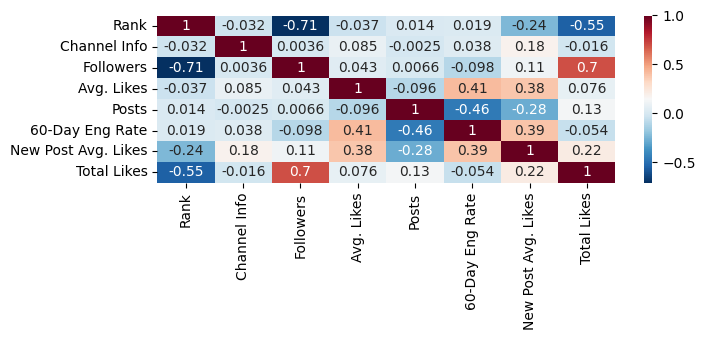

In [240]:
#1. Are there any correlated features in the given dataset? If yes, state the correlation
#   coefficient of the pair of features which are highly correlated
corr_matrix = X_train.corr(method='pearson') 

sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r')
plt.show()

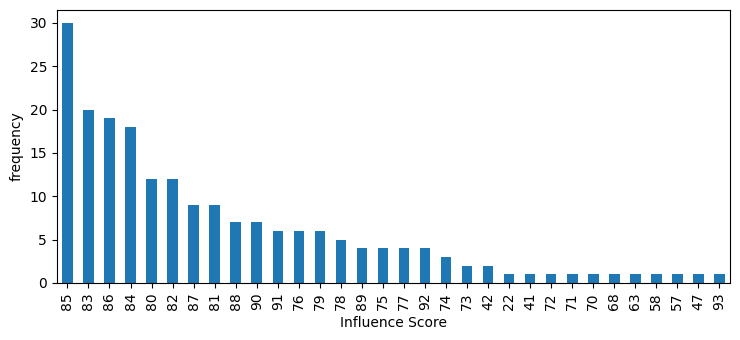

In [241]:

df.sort_values(by=['Influence Score'], ascending=True, inplace=True)

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

df['Influence Score'].value_counts().plot(ax=ax, kind='bar', xlabel='Influence Score', ylabel='frequency')

plt.show()

In [242]:
#2. What is the frequency distribution of the following features?

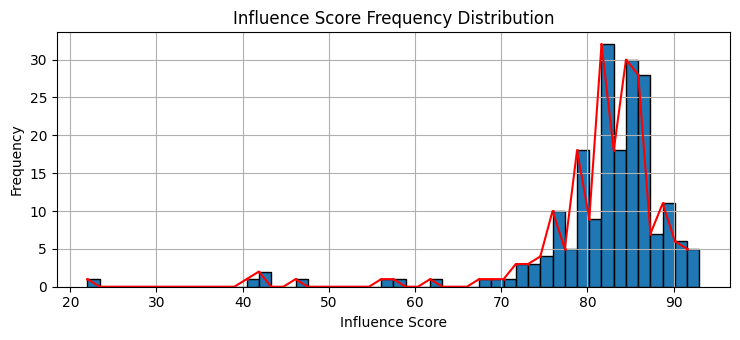

In [102]:
# Create a histogram
hist, bins, _ = plt.hist(df['Influence Score'], bins=50, edgecolor='black')

# Customize the plot
plt.title('Influence Score Frequency Distribution')
plt.xlabel('Influence Score')
plt.ylabel('Frequency')
plt.grid(True)


# Draw a line along the frequency values
plt.plot(bins[:-1], hist, color='red', marker='o', linestyle='-', markersize=1, label='Frequency Line')


# Display the plot
plt.show()

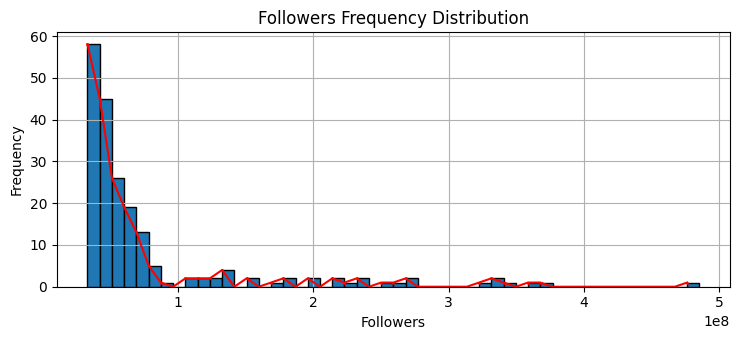

In [243]:
# Create a histogram
hist, bins, _ = plt.hist(df['Followers'], bins=50, edgecolor='black')

# Customize the plot
plt.title('Followers Frequency Distribution')
plt.xlabel('Followers')
plt.ylabel('Frequency')
plt.grid(True)


# Draw a line along the frequency values
plt.plot(bins[:-1], hist, color='red', marker='o', linestyle='-', markersize=1, label='Frequency Line')


# Display the plot
plt.show()

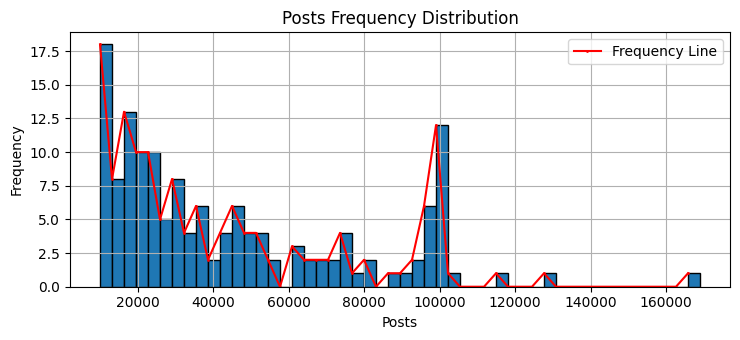

In [244]:
# Create a histogram
hist, bins, _ = plt.hist(df['Posts'], bins=50, edgecolor='black')

# Customize the plot
plt.title('Posts Frequency Distribution')
plt.xlabel('Posts')
plt.ylabel('Frequency')
plt.grid(True)


# Draw a line along the frequency values
plt.plot(bins[:-1], hist, color='red', marker='o', linestyle='-', markersize=1, label='Frequency Line')

plt.legend()
# Display the plot
plt.show()

In [245]:
#3. Country wise influence scores

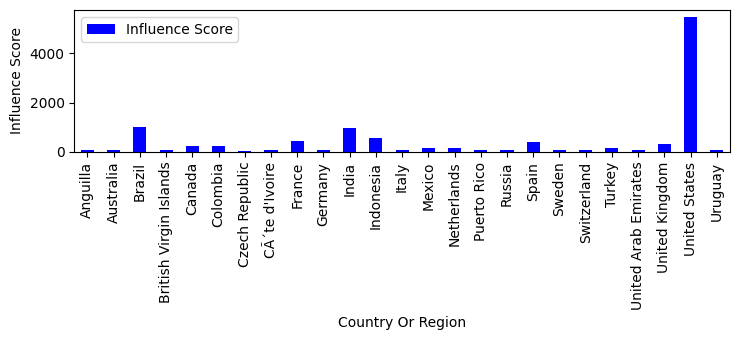

In [246]:
cnt_data = df.groupby('Country Or Region')['Influence Score'].sum()

cnt_data.plot(legend=cnt_data.name, color="blue",  kind="bar")
plt.legend()

plt.ylabel("Influence Score")
# Showing the plot using plt.show()
plt.show()

In [108]:
cnt_data

Country Or Region
Anguilla                    83
Australia                   86
Brazil                    1011
British Virgin Islands      77
Canada                     258
Colombia                   251
Czech Republic              47
CÃ´te d'Ivoire              85
France                     453
Germany                     79
India                      981
Indonesia                  564
Italy                       86
Mexico                     146
Netherlands                164
Puerto Rico                 80
Russia                      63
Spain                      394
Sweden                      83
Switzerland                 85
Turkey                     162
United Arab Emirates        81
United Kingdom             313
United States             5480
Uruguay                     78
Name: Influence Score, dtype: int64

In [ ]:
#4. the top 10 influencers based on Features, Avg likes, total likes

In [247]:
df_top_followers=df.sort_values(by=['Followers'], ascending=False).head(10)

In [248]:
df_top_followers.loc[:,['Channel Info', 'Country Or Region', 'Followers']]

,Channel Info,Country Or Region,Followers
0,\ncristiano,Spain,485200000.0
1,kyliejenner,United States,370700000.0
2,\nleomessi,NaN,363900000.0
3,\nselenagomez,United States,348800000.0
4,\ntherock,United States,339400000.0
5,\narianagrande,United States,333000000.0
6,\nkimkardashia,United States,330700000.0
7,\nbeyonce,United States,276100000.0
8,\nkhloekardashia,United States,273900000.0
9,\njustinbieber,Canada,260000000.0


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 92 to 3
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 200 non-null    int64  
 1   Channel Info         200 non-null    object 
 2   Influence Score      200 non-null    int64  
 3   Followers            200 non-null    float64
 4   Avg. Likes           200 non-null    float64
 5   Posts                146 non-null    float64
 6   60-Day Eng Rate      200 non-null    float64
 7   New Post Avg. Likes  199 non-null    float64
 8   Total Likes          200 non-null    float64
 9   Country Or Region    137 non-null    object 
dtypes: float64(6), int64(2), object(2)
memory usage: 17.2+ KB


In [249]:
df_top_avglikes=df.sort_values(by=['Avg. Likes'], ascending=False).head(10)
df_top_avglikes.loc[:,['Channel Info', 'Country Or Region', 'Avg. Likes']]

,Channel Info,Country Or Region,Avg. Likes
96,\nthv,NaN,15400000.0
131,\nj.m,NaN,14400000.0
165,\nrkive,NaN,10600000.0
27,\nrealmadrid,Spain,9896000.0
171,\neminem,United States,9884000.0
146,\nranveersingh,Switzerland,9869000.0
89,\nsergioramos,NaN,9837000.0
40,\nShakira,NaN,9761000.0
86,\ntatawerneck,Brazil,9589000.0
137,\nbrunamarquezine,United States,9435000.0


In [250]:
df_top_likes=df.sort_values(by=['Total Likes'], ascending=False).head(10)
df_top_likes.loc[:,['Channel Info', 'Country Or Region', 'Total Likes']]

,Channel Info,Country Or Region,Total Likes
1,kyliejenner,United States,5.740000e+10
0,\ncristiano,Spain,2.910000e+10
22,\nzendaya,United States,2.080000e+10
6,\nkimkardashia,United States,1.980000e+10
5,\narianagrande,United States,1.850000e+10
25,\nbadgalriri,United States,1.800000e+10
19,\nneymarjr,Brazil,1.440000e+10
9,\njustinbieber,Canada,1.400000e+10
16,\nnickiminaj,United States,1.290000e+10
4,\ntherock,United States,1.260000e+10


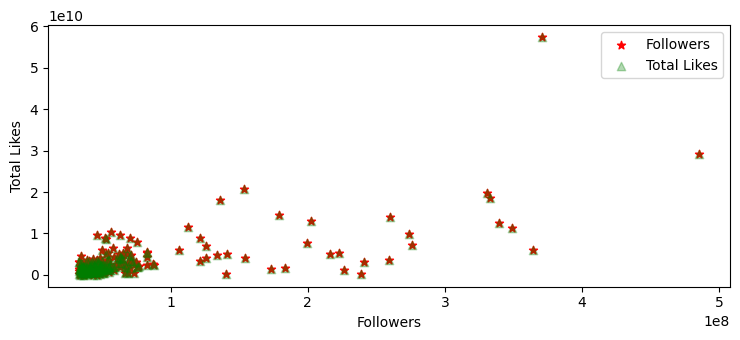

In [251]:
#5. relationship between the features Followers and Total Likes

plt.scatter(df['Followers'],  df['Total Likes'], c='red', marker='*', alpha=1, label='Followers')
plt.scatter(df['Followers'],  df['Total Likes'], c='green', marker='^', alpha=0.3, label='Total Likes')


#df.plot(x='Channel Info', y='Followers', kind="bar", ax=ax, color="maroon")
plt.legend()


plt.xlabel("Followers")
plt.ylabel("Total Likes")
plt.show()


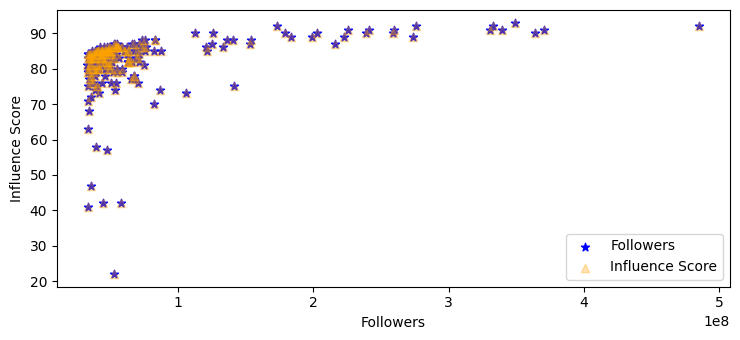

In [252]:
#5. relationship between the features Followers and Influence Score

plt.scatter(df['Followers'],  df['Influence Score'], c='Blue', marker='*', alpha=1, label='Followers')
plt.scatter(df['Followers'],  df['Influence Score'], c='orange', marker='^', alpha=0.3, label='Influence Score')


#df.plot(x='Channel Info', y='Followers', kind="bar", ax=ax, color="maroon")
plt.legend()


plt.xlabel("Followers")
plt.ylabel("Influence Score")
plt.show()


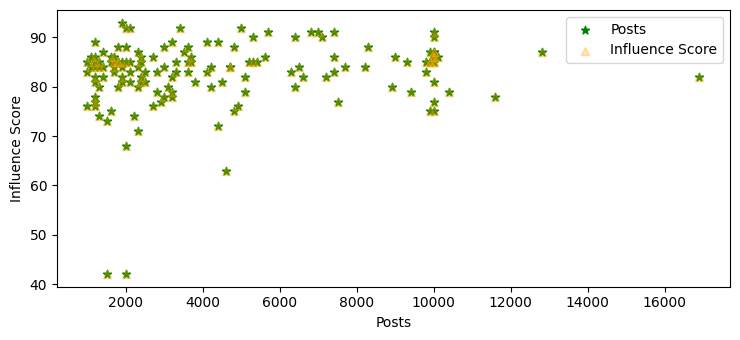

In [222]:
#5. relationship between the features Posts and Influence Score


plt.scatter(df['Posts'],  df['Influence Score'], c='Green', marker='*', alpha=1, label='Posts')
plt.scatter(df['Posts'],  df['Influence Score'], c='orange', marker='^', alpha=0.3, label='Influence Score')


#df.plot(x='Channel Info', y='Followers', kind="bar", ax=ax, color="maroon")
plt.legend()


plt.xlabel("Posts")
plt.ylabel("Influence Score")
plt.show()

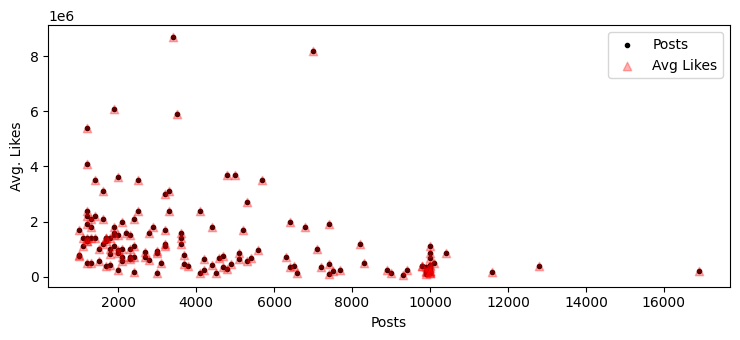

In [223]:
#5. relationship between the features Posts and Influence Score

plt.scatter(df['Posts'],  df['Avg. Likes'], c='black', marker='.', alpha=1, label='Posts')
plt.scatter(df['Posts'],  df['Avg. Likes'], c='red', marker='^', alpha=0.3, label='Avg Likes')


#df.plot(x='Channel Info', y='Followers', kind="bar", ax=ax, color="maroon")
plt.legend()


plt.xlabel("Posts")
plt.ylabel('Avg. Likes')
plt.show()